In [1]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

## This notebook has three parts:
- Generating data and visualization.
- Implementing FastICA
- Visualizing your prediction, which should be similar to S_noise

## 1. Generating data and visualization

In [2]:
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  # sinusoidal
s2 = np.sign(np.sin(3 * time))  # square signal
s3 = signal.sawtooth(2 * np.pi * time)  # saw tooth signal

In [3]:
S_real = np.c_[s1, s2, s3]   # signal without noise

S_noise = np.c_[s1, s2, s3]  # signal with nosie
S_noise += 0.2 * np.random.normal(size=S_noise.shape)  # Add noise
S_noise /= S_noise.std(axis=0)  # Standardize data

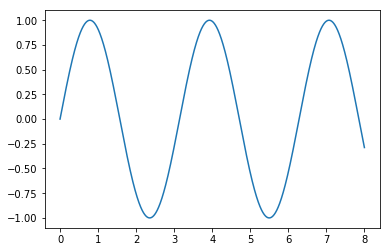

In [4]:
plt.plot(time,s1)
plt.show()

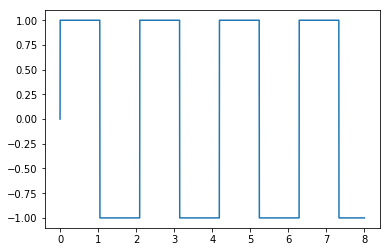

In [5]:
plt.plot(time,s2)
plt.show()

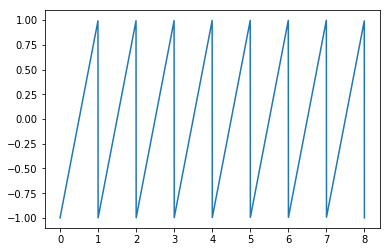

In [6]:
plt.plot(time,s3)
plt.show()

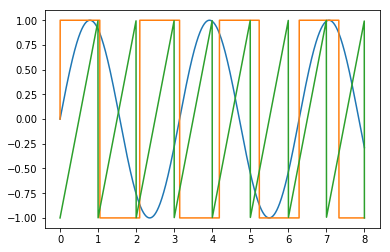

In [7]:
plt.plot(time,S_real)
plt.show()

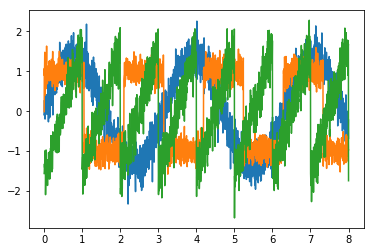

In [8]:
plt.plot(time,S_noise)
plt.show()

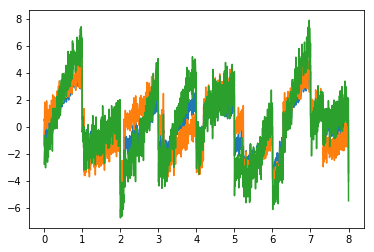

[[ 3.  -1.  -1. ]
 [ 0.5  0.5 -0.5]
 [-2.5  0.5  1.5]]
(3, 2000)


In [9]:
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S_noise, A.T)  # Generate noisy input x 
plt.plot(time,X)
plt.show()
print(np.linalg.inv(A))

X = X.T
print(X.shape)

## 2. FastICA
- Implement your FastICA algorithm here. 
- Feel free to define helper functions such as whiten(), g(), g_prime() et al.
- This is the **only part** that requires modification.

In [10]:
def whitenData(X):
    
    U, V = np.linalg.eig(np.cov(X))
#     print(U.shape)
    return V @ np.diag(np.power(U, -0.5)) @ (V.T @ X)

def g_fun(u):
    
    return np.tanh(u)

def gprime(u):
    qty = (1 - np.tanh(u)*np.tanh(u) )
    return qty

In [14]:
def ICA(X, iterations=1000, tol=1e-5):
    
    n_sample = X.shape[1]
#     print(np.mean(X, axis=1).shape)
    X = X - np.tile(np.mean(X, axis=1).reshape((X.shape[0],1)), n_sample)

    X_hat = whitenData(X)
    
    W_main = np.random.rand(3,3)
    
    for j in range(W_main.shape[1]):
                
        w_j = W_main[:,j]
        iter=0
            
        while(iter<iterations):
            
            sum1=0; sum2=0
            
            # find summations
            for i in range(n_sample):

                sum1 = sum1 + X_hat[:,i] * g_fun( w_j.T @ X_hat[:,i] )
                sum2 = sum2 + gprime( w_j.T @ X_hat[:,i] )*w_j
            
#             w_j_plus=0
            w_j_plus = sum1/n_sample - sum2/n_sample

            if j >= 1:
                sum3=0
                
                for i1 in range(j):
                    sum3 = sum3 + (w_j_plus.T @ W_main[:, i1]) * W_main[:,i1]
                    
                w_j_plus = w_j_plus - sum3
            
            w_j_plus = w_j_plus/np.sqrt(np.sum(np.square(w_j_plus)))  #np.linalg.norm(w_j_plus)
            
            if np.abs(np.abs(w_j.T @ w_j_plus) - 1) < tol:
                print('broke')
                break
                
            else:
                w_j = w_j_plus
                iter=iter+1
                continue
                
        W_main[:,j] = w_j_plus
            
        
    S = W_main.T@X_hat
    
    return W_main, S

## 3. Prediction visualization
- Run your FastICA algorithm and visualize S, which should look like S_noise

In [15]:
W, S = ICA(X)
print(W)

broke
broke
broke
[[ 0.34818186  0.91931755 -0.1833702 ]
 [ 0.93234185 -0.31925634  0.16974706]
 [-0.09750935  0.23006656  0.96827749]]


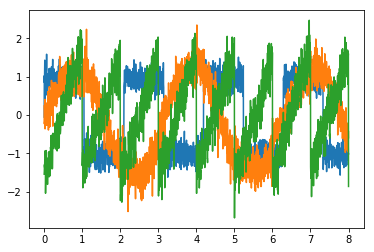

In [16]:
for i in range(S.shape[0]):
    plt.plot(time, S[i])